C:\Users\IN_CAP02\AppData\Local\Temp\ipykernel_18000\2988115179.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Xte[:, 0], Xte[:, 1], c=yte, cmap=plt.cm.coolwarm, edgecolors="k", marker="x", s=50, label="Test")


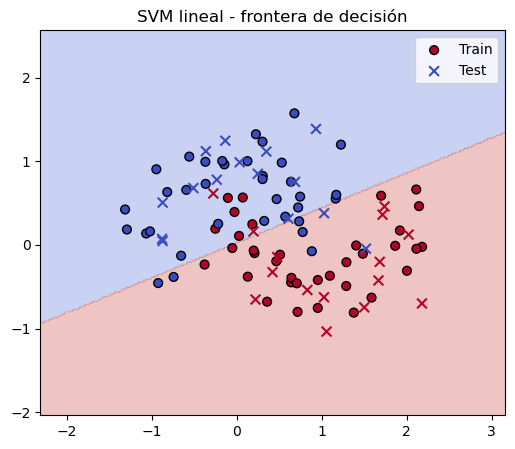

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X, y = make_moons(noise=0.3, random_state=0)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1))
clf.fit(Xtr, ytr)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, cmap=plt.cm.coolwarm, edgecolors="k", s=40, label="Train")
plt.scatter(Xte[:, 0], Xte[:, 1], c=yte, cmap=plt.cm.coolwarm, edgecolors="k", marker="x", s=50, label="Test")
plt.title("SVM lineal - frontera de decisión")
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import panda as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X, y = np.read
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    ("SVM lineal", make_pipeline(StandardScaler(), SVC(kernel="linear", C=1))),
    ("SVM RBF",    make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1, gamma=0.7))),
    ("MLP",        make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10,),
                                                                max_iter=2000, random_state=1)))
]

for name, clf in models:
    clf.fit(Xtr, ytr)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, clf) in zip(axs, models):
    Z = clf.predict(grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, cmap=plt.cm.coolwarm, edgecolors="k", s=25, alpha=0.8)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=yte, cmap=plt.cm.coolwarm, edgecolors="k", s=25, marker="x", alpha=0.9)
    acc = accuracy_score(yte, clf.predict(Xte))
    ax.set_title(f"{name} | Acc: {acc:.2f}")
    ax.set_xticks([]); ax.set_yticks([])

plt.suptitle("Comparación de fronteras de decisión (train •, test x)", y=1.02)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'panda'